In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from pyforest import *

In [2]:
train=pd.read_excel("Data_Train.xlsx")

In [3]:
test=pd.read_excel("Data_Test.xlsx")

In [4]:
train.head(2)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes


In [5]:
test.head(2)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-


In [6]:
train.shape

(11094, 9)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null object
Minimum_Order    11094 non-null object
Rating           11094 non-null object
Votes            11094 non-null object
Reviews          11094 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 390.1+ KB


In [8]:
test.shape

(2774, 8)

#observation
1.location and cuisines need cleaning

2.Remove the rupee symbol from avg cost and min cost

3.check the rating and revievs .There is relation between rating,votes and reviews

4.target variable has minutes in it so it has became categorical

# Univariate Analysis

In [9]:
#combine the Datasets
combined=pd.concat([train,test],sort= False,ignore_index=True)

In [10]:
combined.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [11]:
#1.Delivery Time
#encoder(number transformer)
#labelencoder(one-column),dont use OHE
combined.Delivery_Time.value_counts()

30 minutes     7406
45 minutes     2665
65 minutes      923
120 minutes      62
20 minutes       20
80 minutes       14
10 minutes        4
Name: Delivery_Time, dtype: int64

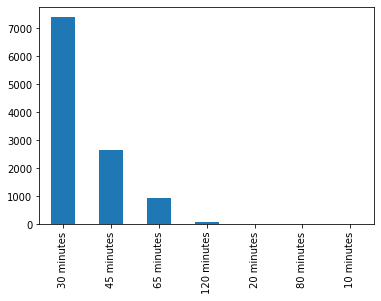

In [12]:
combined.Delivery_Time.value_counts().plot(kind = "bar")

In [13]:
combined.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

In [14]:
combined.Reviews.unique()

#review the dash in reviews

array(['4', '30', '95', '235', '18', '31', '1235', '26', '294', '61',
       '1239', '-', '128', '5', '53', '47', '46', '23', '160', '2', '1',
       '38', '9', '19', '7', '132', '74', '13', '111', '499', '29', '34',
       '851', '513', '22', '27', '32', '25', '37', '8', '35', '6', '173',
       '36', '15', '174', '11', '59', '16', '89', '170', '10', '1660',
       '71', '41', '20', '40', '3', '191', '105', '100', '106', '21',
       '65', '69', '2547', '159', '110', '42', '181', '109', '179', '490',
       '28', '343', '118', '690', '72', '296', '33', '164', '50', '129',
       '1581', '234', '45', '2363', '24', '115', '12', '138', '175', '39',
       '66', '1603', '1443', '390', '108', '1457', '112', '107', '259',
       '269', '52', '196', '794', '589', '48', '145', '536', '247', '17',
       '49', '245', '87', '83', '54', '453', '318', '99', '205', '165',
       '1845', '766', '114', '44', '51', '104', '478', '70', '232', '435',
       '14', '659', '554', '399', '77', '88', '503',

In [15]:
combined.Votes.value_counts()

-       2616
4        298
6        255
7        242
9        238
        ... 
649        1
3386       1
514        1
1398       1
2037       1
Name: Votes, Length: 1181, dtype: int64

In [16]:
combined.Rating.unique()
#dash ,string based info such as new,opening soon and temp closed

array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2', '-', '2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1', 'NEW', '2.9', '4.6',
       '4.3', '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5',
       'Opening Soon', '2.2', '4.9', '2.3', '2.1', 'Temporarily Closed'],
      dtype=object)

In [17]:
combined.Average_Cost.unique()
#to deal with symbol ,comma and for 

array(['₹200', '₹100', '₹150', '₹250', '₹650', '₹350', '₹800', '₹50',
       '₹400', '₹600', '₹300', '₹750', '₹450', '₹550', '₹1,000', '₹500',
       '₹900', '₹1,200', '₹950', '₹850', '₹700', '₹1,150', 'for',
       '₹1,100', '₹1,400', '₹2,050'], dtype=object)

In [18]:
combined.Minimum_Order.unique()

array(['₹50', '₹99', '₹0', '₹200', '₹450', '₹350', '₹79', '₹400', '₹199',
       '₹500', '₹250', '₹150', '₹90', '₹299', '₹300', '₹240', '₹89',
       '₹59', '₹149', '₹399'], dtype=object)

In [19]:
combined.Minimum_Order[0] #fetch first single value

'₹50'

In [20]:
int(combined.Minimum_Order[0].split("₹")[1])

50

In [21]:
mylist=[]
for i in combined.Minimum_Order:
    mylist.append(int(i.split("₹")[1]))

In [22]:
#ADD NEW COLUMN-MIN ORder cleansed
combined["MinOrder_cleansed"]=pd.Series(mylist)

In [23]:
combined.Average_Cost[0]

'₹200'

In [24]:
a='₹2,050'.split("₹")[1]

In [25]:
a

'2,050'

In [26]:
int(a.replace(",", ""))

2050

In [27]:
int('₹2,050'.split("₹")[1].replace(",", ""))

2050

In [28]:
combined.loc[combined.Average_Cost=="for"]

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,MinOrder_cleansed
6297,ID_6472,Pune University,Fast Food,for,₹50,NEW,-,-,30 minutes,50


In [29]:
combined.loc[combined.Average_Cost=="for","Average_Cost"]="0"

In [30]:
int('₹7,000'.replace("₹", "").replace(",", ""))

7000

In [31]:
cost=[]
for i in combined.Average_Cost:
    cost.append(int(i.replace("₹", "").replace(",", "")))

In [32]:
#ADD NEW COLUMN- Average_Cost cleansed
combined["AvgCost_cleansed"]=pd.Series(cost)

In [33]:
combined.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,MinOrder_cleansed,AvgCost_cleansed
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,50,200
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,50,100
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,50,150
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,99,250
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,99,200


In [34]:
combined.Location.unique()

array(['FTI College, Law College Road, Pune', 'Sector 3, Marathalli',
       'Mumbai Central', 'Sector 1, Noida',
       'Rmz Centennial, I Gate, Whitefield', 'Delhi University-GTB Nagar',
       'Yerawada, Pune, Maharashtra',
       'Delhi Administration Flats, Timarpur', 'Moulali, Kolkata',
       'Dockyard Road, Mumbai CST Area', 'Pune University',
       'Gora Bazar, Rajbari, North Dumdum, Kolkata',
       'D-Block, Sector 63, Noida', 'Sector 14, Noida',
       'Mico Layout, Stage 2, BTM Layout,Bangalore',
       'Laxman Vihar Industrial Area, Sector 3A, Gurgoan',
       'Tiretti, Kolkata', 'Sandhurst Road, Mumbai CST Area',
       'MG Road, Pune', 'Hyderabad Public School, Begumpet', 'Majestic',
       'Chandni Chowk, Kolkata', 'Delhi High Court, India Gate',
       'Chatta Bazaar, Malakpet, Hyderabad', 'Sector 63A,Gurgaon',
       'Delhi Cantt.', 'Tejas Nagar Colony, Wadala West, Mumbai',
       'Babarpur, New Delhi, Delhi', 'Nathan Road, Mangaldas Road, Pune',
       'Panjetan C

In [35]:
#location
combined.Location[0].split(",")

['FTI College', ' Law College Road', ' Pune']

In [36]:
combined.Location[0].split(", ")[-1]

'Pune'

In [37]:
locs=[]
for i in combined.Location:
    locs.append(i.split(", ")[-1])

In [38]:
combined["Location_Cleansed"]=pd.Series(locs)

In [39]:
combined.Location_Cleansed.unique()

array(['Pune', 'Marathalli', 'Mumbai Central', 'Noida', 'Whitefield',
       'Delhi University-GTB Nagar', 'Maharashtra', 'Timarpur', 'Kolkata',
       'Mumbai CST Area', 'Pune University', 'BTM Layout,Bangalore',
       'Gurgoan', 'Begumpet', 'Majestic', 'India Gate', 'Hyderabad',
       'Sector 63A,Gurgaon', 'Delhi Cantt.', 'Mumbai', 'Delhi',
       'Electronic City'], dtype=object)

In [40]:
#Banglore
combined.Location_Cleansed.replace(to_replace=['Marathalli','Whitefield','Majestic','BTM Layout,Bangalore','Electronic City'],
                                  value=["Bangalore"]*5,inplace=True)

In [41]:
#pune
combined.Location_Cleansed.replace(to_replace=['Maharashtra','Pune University'],value=["Pune"]*2,inplace=True)

In [42]:
#delhi

combined.Location_Cleansed.replace(to_replace=['Delhi University-GTB Nagar','Timarpur','Delhi Cantt.','India Gate'],
                                  value=["Delhi"]*4,inplace=True)

In [43]:
#Gurgaon Spell Check
combined.loc[combined.Location_Cleansed=="Gurgoan","Location_Cleansed"]="Gurgaon"

In [44]:
#Gurgaon
combined.Location_Cleansed.replace('Sector 63A,Gurgaon',"Gurgaon",inplace=True)

In [45]:
#hyderabad
combined.Location_Cleansed.replace('Begumpet',"Hyderabad",inplace=True)

In [46]:
combined.Location_Cleansed.unique()

array(['Pune', 'Bangalore', 'Mumbai Central', 'Noida', 'Delhi', 'Kolkata',
       'Mumbai CST Area', 'Gurgaon', 'Hyderabad', 'Mumbai'], dtype=object)

In [47]:
#mumbai
combined.Location_Cleansed.replace(to_replace=['Mumbai Central','Mumbai CST Area'],value=["Mumbai"]*2,inplace=True)

In [48]:
combined.Location_Cleansed.value_counts()

Noida        2647
Bangalore    2628
Delhi        2539
Pune         2442
Mumbai       1536
Gurgaon       934
Kolkata       678
Hyderabad     464
Name: Location_Cleansed, dtype: int64

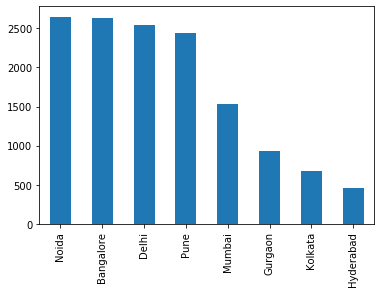

In [49]:
combined.Location_Cleansed.value_counts().plot(kind="bar")

In [50]:
combined.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time', 'MinOrder_cleansed',
       'AvgCost_cleansed', 'Location_Cleansed'],
      dtype='object')

In [51]:
#Cuisines

combined.Cuisines.unique()

array(['Fast Food, Rolls, Burger, Salad, Wraps', 'Ice Cream, Desserts',
       'Italian, Street Food, Fast Food', ...,
       'North Indian, Chinese, Japanese',
       'Asian, Italian, Continental, Desserts, Healthy Food',
       'North Indian, Rolls, Chinese, Continental, Fast Food'],
      dtype=object)

In [52]:
combined.Cuisines[0].split(", ")

['Fast Food', 'Rolls', 'Burger', 'Salad', 'Wraps']

In [53]:
food=[]
for i in combined.Cuisines:
    food.append(i.split(", "))

In [54]:
df = pd.DataFrame(food)

In [55]:
df.head()

,0,1,2,3,4,5,6,7
0,Fast Food,Rolls,Burger,Salad,Wraps,None,None,None
1,Ice Cream,Desserts,None,None,None,None,None,None
2,Italian,Street Food,Fast Food,None,None,None,None,None
3,Mughlai,North Indian,Chinese,None,None,None,None,None
4,Cafe,Beverages,None,None,None,None,None,None


In [56]:
df[0].unique()

array(['Fast Food', 'Ice Cream', 'Italian', 'Mughlai', 'Cafe',
       'South Indian', 'Beverages', 'Chinese', 'Mithai', 'North Indian',
       'Burger', 'Biryani', 'Kerala', 'Desserts', 'Bakery', 'Asian',
       'Street Food', 'Pizza', 'Lucknowi', 'Tea', 'Rolls', 'Bengali',
       'Mishti', 'European', 'Momos', 'Continental', 'Andhra', 'German',
       'Finger Food', 'Sandwich', 'Chettinad', 'Juices', 'Parsi',
       'Japanese', 'Salad', 'Tamil', 'North Eastern', 'Maharashtrian',
       'Tibetan', 'Arabian', 'Bar Food', 'Konkan', 'Odia', 'Paan',
       'Wraps', 'Lebanese', 'American', 'Mediterranean', 'Bohri',
       'Mangalorean', 'Thai', 'Healthy Food', 'Raw Meats', 'Gujarati',
       'Seafood', 'Rajasthani', 'BBQ', 'Coffee', 'Mexican', 'Goan',
       'Korean', 'Kebab', 'Kashmiri', 'Bihari', 'Portuguese',
       'Frozen Yogurt', 'Afghan', 'Awadhi', 'Malwani', 'Malaysian',
       'Hyderabadi', 'French', 'Modern Indian', 'Sushi', 'Hot dogs',
       'Iranian', 'Brazilian', 'Indian', 'Af

In [57]:
fastfood=['Fast Food','Cafe','Burger','Street Food', 'Pizza','Rolls','Momos','Finger Food', 'Sandwich','Bar Food','Wraps','Hot dogs']
beverages=['Beverages','Tea','Juices','Bubble Tea','Coffee']
deserts=['Ice Cream','Mithai','Desserts','Bakery','Mishti','Paan','Frozen Yogurt']
maincourse=['Italian','Mughlai','South Indian','Chinese','North Indian','Biryani','Kerala','Asian','Lucknowi','Bengali'
           ,'European','Continental','Andhra', 'German','Chettinad', 'Parsi','Japanese','Salad','Tamil', 'North Eastern', 'Maharashtrian',
       'Tibetan', 'Arabian','Konkan', 'Odia', 'Lebanese', 'American', 'Mediterranean', 'Bohri',
       'Mangalorean', 'Thai', 'Healthy Food', 'Raw Meats', 'Gujarati',
       'Seafood', 'Rajasthani', 'Mexican', 'Goan','Greek'
       'Korean', 'Kebab', 'Kashmiri', 'Bihari', 'Portuguese','Afghan', 'Awadhi', 'Malwani', 'Malaysian',
       'Hyderabadi', 'French', 'Modern Indian', 'Sushi','Iranian', 'Brazilian', 'Indian', 'African','Turkish', 'Assamese', 'Naga',
        'Middle Eastern', 'Vietnamese','Burmese','Roast Chicken','South American''Sri Lankan'
       'Steak','Charcoal Chicken','Cantonese','Belgian','Charcoal Chicken','Tex-Mex','Spanish','Nepalese','Bangladeshi','Poké']

In [58]:
set(df[6])-set(df[7])

{'Andhra',
 'Biryani',
 'Coffee',
 'European',
 'Italian',
 'Kebab',
 'Malaysian',
 'Mithai',
 'Modern Indian',
 'Rolls',
 'Salad',
 'Seafood',
 'Sushi',
 'Vietnamese',
 'Wraps'}

In [59]:
set(df[0])-set(df[1])

{'African',
 'Assamese',
 'Bohri',
 'Frozen Yogurt',
 'Goan',
 'Hot dogs',
 'Kashmiri',
 'Konkan',
 'Parsi',
 'Portuguese',
 'Tamil',
 'Turkish'}

In [60]:
#function to convert the food into cats
def foodcatbanao(x):
    if(x in fastfood):
        return("Fast Food")
    elif(x in beverages):
        return("Beverages")
    elif(x in deserts):
        return("Deserts")
    else:
        return("Main Course")

In [61]:
combined["Cuisines_Cleansed"]=pd.Series(df[0].apply(foodcatbanao))

In [62]:
combined.loc[combined.Average_Cost=="0"]

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,MinOrder_cleansed,AvgCost_cleansed,Location_Cleansed,Cuisines_Cleansed
6297,ID_6472,Pune University,Fast Food,0,₹50,NEW,-,-,30 minutes,50,0,Pune,Fast Food


In [63]:
combined[(combined.Location_Cleansed=="Pune") &(combined.Cuisines_Cleansed=="Fast Food")]["AvgCost_cleansed"].describe()


count    802.000000
mean     186.097257
std      117.120489
min        0.000000
25%      100.000000
50%      150.000000
75%      200.000000
max      800.000000
Name: AvgCost_cleansed, dtype: float64

In [64]:
#imputing the values
combined.loc[combined.Average_Cost=="0","AvgCost_cleansed"]=150

In [65]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13868 entries, 0 to 13867
Data columns (total 13 columns):
Restaurant           13868 non-null object
Location             13868 non-null object
Cuisines             13868 non-null object
Average_Cost         13868 non-null object
Minimum_Order        13868 non-null object
Rating               13868 non-null object
Votes                13868 non-null object
Reviews              13868 non-null object
Delivery_Time        11094 non-null object
MinOrder_cleansed    13868 non-null int64
AvgCost_cleansed     13868 non-null int64
Location_Cleansed    13868 non-null object
Cuisines_Cleansed    13868 non-null object
dtypes: int64(2), object(11)
memory usage: 812.6+ KB


In [66]:
#Rating
combined.Rating.unique()

array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2', '-', '2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1', 'NEW', '2.9', '4.6',
       '4.3', '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5',
       'Opening Soon', '2.2', '4.9', '2.3', '2.1', 'Temporarily Closed'],
      dtype=object)

In [67]:
combined[combined.Rating=="NEW"].shape

(958, 13)

In [68]:
combined.Rating=pd.to_numeric(combined.Rating,errors="coerce")

In [69]:
combined.Rating.describe()

count    11398.000000
mean         3.610791
std          0.413490
min          2.100000
25%          3.300000
50%          3.600000
75%          3.900000
max          4.900000
Name: Rating, dtype: float64

In [70]:
combined.Rating.fillna(value=3.6,inplace=True)

In [71]:
#Reviews
combined.Reviews=pd.to_numeric(combined.Reviews,errors="coerce")

In [72]:
combined.Reviews.describe()

count    10963.000000
mean       120.893004
std        315.592114
min          1.000000
25%          7.000000
50%         26.000000
75%         90.000000
max       6504.000000
Name: Reviews, dtype: float64

In [73]:
combined.Reviews.fillna(value=26,inplace=True)

In [74]:
#votes
combined.Votes=pd.to_numeric(combined.Votes,errors="coerce")

In [75]:
combined.Votes.describe()

count    11252.000000
mean       241.050036
std        549.570301
min          3.000000
25%         19.000000
50%         63.000000
75%        214.000000
max       9054.000000
Name: Votes, dtype: float64

In [76]:
combined.Votes.fillna(value=63,inplace=True)

In [77]:
#Rating Category Func
def rating_cat(x):
    if(x>=4.5):
        return("Excellent")
    elif(x>=4.0):
        return("Very Good")
    elif(x>=3.5):
        return("Good")
    elif(x>=3.0):
        return("Average")
    else:
        return("Poor")

In [78]:
combined["Rating_Category"]=combined.Rating.apply(rating_cat)

In [79]:
combined

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,MinOrder_cleansed,AvgCost_cleansed,Location_Cleansed,Cuisines_Cleansed,Rating_Category
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12.0,4.0,30 minutes,50,200,Pune,Fast Food,Good
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11.0,4.0,30 minutes,50,100,Bangalore,Deserts,Good
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99.0,30.0,65 minutes,50,150,Mumbai,Main Course,Good
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176.0,95.0,30 minutes,99,250,Noida,Main Course,Good
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521.0,235.0,65 minutes,99,200,Bangalore,Fast Food,Average
5,ID_5221,"Rmz Centennial, I Gate, Whitefield","South Indian, North Indian, Chinese",₹150,₹50,3.8,46.0,18.0,30 minutes,50,150,Bangalore,Main Course,Good
6,ID_3777,Mumbai Central,"Beverages, Fast Food",₹150,₹50,3.7,108.0,31.0,30 minutes,50,150,Mumbai,Beverages,Good
7,ID_745,Delhi University-GTB Nagar,"Chinese, Thai, Asian",₹650,₹50,4.0,1731.0,1235.0,45 minutes,50,650,Delhi,Main Course,Very Good
8,ID_2970,Delhi University-GTB Nagar,"Mithai, Street Food",₹100,₹50,3.9,110.0,26.0,30 minutes,50,100,Delhi,Deserts,Good
9,ID_3474,"Sector 1, Noida","Fast Food, North Indian, Rolls, Chinese, Momos...",₹200,₹50,3.9,562.0,294.0,65 minutes,50,200,Noida,Fast Food,Good


In [80]:
#split the Data in train and test

newtrain=combined.loc[:train.shape[0]-1]

In [81]:
newtrain.shape

(11094, 14)

In [82]:
newtest=combined.loc[11094:combined.shape[0]]

In [83]:
newtest.shape

(2774, 14)

In [84]:
newtrain.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time', 'MinOrder_cleansed',
       'AvgCost_cleansed', 'Location_Cleansed', 'Cuisines_Cleansed',
       'Rating_Category'],
      dtype='object')

In [85]:
train_new=newtrain.drop(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order'], axis=1)

In [86]:
test_new=newtest.drop(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order','Delivery_Time'], axis=1)

In [87]:
train_new.head()

,Rating,Votes,Reviews,Delivery_Time,MinOrder_cleansed,AvgCost_cleansed,Location_Cleansed,Cuisines_Cleansed,Rating_Category
0,3.5,12.0,4.0,30 minutes,50,200,Pune,Fast Food,Good
1,3.5,11.0,4.0,30 minutes,50,100,Bangalore,Deserts,Good
2,3.6,99.0,30.0,65 minutes,50,150,Mumbai,Main Course,Good
3,3.7,176.0,95.0,30 minutes,99,250,Noida,Main Course,Good
4,3.2,521.0,235.0,65 minutes,99,200,Bangalore,Fast Food,Average


c:\users\kohad\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\users\kohad\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


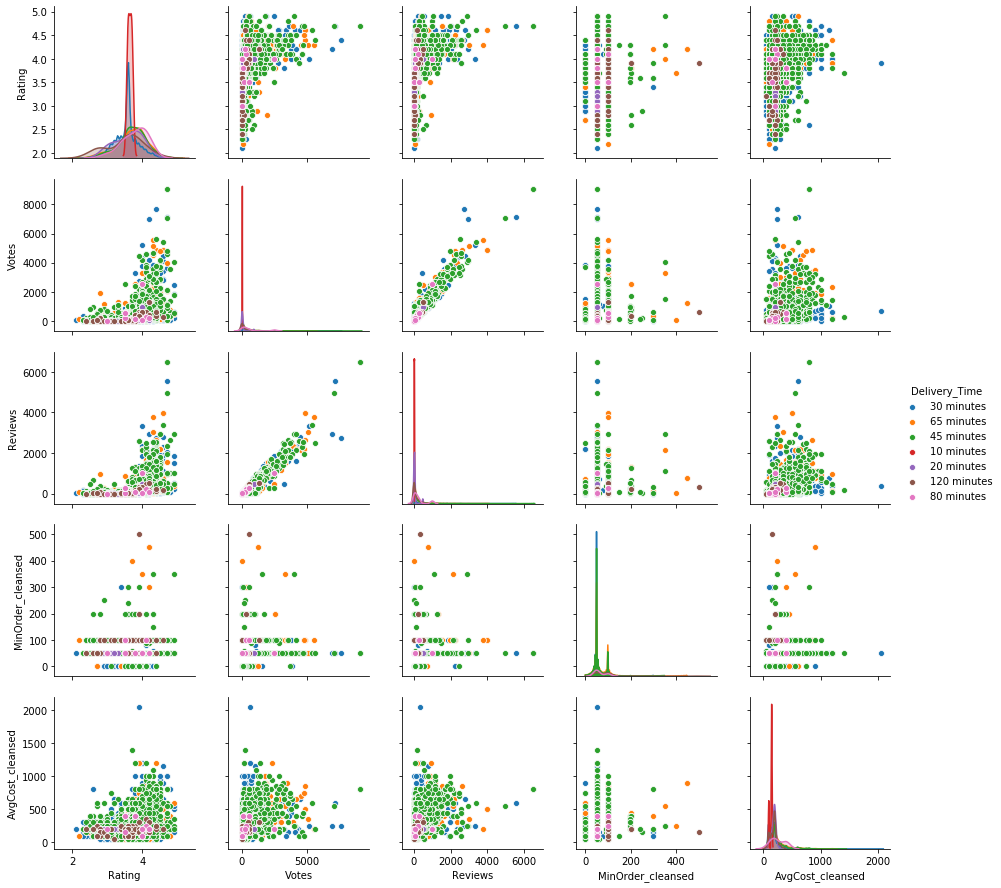

In [88]:
sns.pairplot(train_new ,hue="Delivery_Time")

### problem statement- I want find out if rating has an impact on delivery time

### NULL Hypothesis
H0=THere is no impact on Delivery TIME VS RATING

### Alternative Hypothesis
H1=There is Impact on Delivery Time vs Rating.IN Other words,the delivery time is impacted by the ratings

### choose Level of significance vs Alpha
LOS=0.95 and Alpha=0.05

### Test of significance -ANova | Ftest

(Since one column is numerical and another is categorial in nature)

# Inference rule- If p val is < 0.05, then we reject the null hypo and accept the alternate hypo and vice versa


In [89]:
import scipy.stats as stats
import statsmodels.api as sms #Anova Table Library
from statsmodels.formula.api import ols #regression fit model

In [90]:
#lets fit ols model
model=ols("Rating~Delivery_Time" ,data=train_new).fit()

In [91]:
#anova
sms.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Delivery_Time,6.0,51.471247,8.578541,62.727838,7.136598e-77
Residual,11087.0,1516.237260,0.136758,NaN,NaN


## Summary of the test

### 1.If the columns are numerical in nature and no population metric is given then T-test is an ideal test

### 2. If one column is numerical and another one is categorical in nature then the variance can be explained by applying ANOVA.

### 3.If both the columns are categorical in nature ,the we apply CHI-SQUARE test of goodness of fit.


In [92]:
 df= pd.crosstab(train_new['Rating'],train_new['Delivery_Time'])

In [93]:
st.chi2_contingency(df)

(1468.9032957219797,
 2.3043062828739024e-206,
 168,
 array([[3.60555255e-04, 5.58860645e-03, 1.80277628e-03, 6.67568055e-01,
         2.40219939e-01, 8.31981251e-02, 1.26194339e-03],
        [3.60555255e-04, 5.58860645e-03, 1.80277628e-03, 6.67568055e-01,
         2.40219939e-01, 8.31981251e-02, 1.26194339e-03],
        [2.16333153e-03, 3.35316387e-02, 1.08166577e-02, 4.00540833e+00,
         1.44131963e+00, 4.99188751e-01, 7.57166036e-03],
        [4.68721832e-03, 7.26518839e-02, 2.34360916e-02, 8.67838471e+00,
         3.12285920e+00, 1.08157563e+00, 1.64052641e-02],
        [9.73499189e-03, 1.50892374e-01, 4.86749594e-02, 1.80243375e+01,
         6.48593835e+00, 2.24634938e+00, 3.40724716e-02],
        [1.51433207e-02, 2.34721471e-01, 7.57166036e-02, 2.80378583e+01,
         1.00892374e+01, 3.49432125e+00, 5.30016225e-02],
        [2.74021994e-02, 4.24734090e-01, 1.37010997e-01, 5.07351722e+01,
         1.82567153e+01, 6.32305751e+00, 9.59076979e-02],
        [5.66071750e-02, 8.774

### Introduction to Ensembles

 1. Normally in any machine learning problem we have train and test set now validation set

In [94]:
#dealing with target variable

from sklearn.preprocessing import StandardScaler,LabelEncoder

In [95]:
le=LabelEncoder() #created a machine called le that has label endcoder 

In [96]:
train_new["Delivery_TimeCoded"]= le.fit_transform(train_new.Delivery_Time)

In [97]:
train_new.head()

,Rating,Votes,Reviews,Delivery_Time,MinOrder_cleansed,AvgCost_cleansed,Location_Cleansed,Cuisines_Cleansed,Rating_Category,Delivery_TimeCoded
0,3.5,12.0,4.0,30 minutes,50,200,Pune,Fast Food,Good,3
1,3.5,11.0,4.0,30 minutes,50,100,Bangalore,Deserts,Good,3
2,3.6,99.0,30.0,65 minutes,50,150,Mumbai,Main Course,Good,5
3,3.7,176.0,95.0,30 minutes,99,250,Noida,Main Course,Good,3
4,3.2,521.0,235.0,65 minutes,99,200,Bangalore,Fast Food,Average,5


In [98]:
#drop the feature delivery time

finaltrain=train_new.drop("Delivery_Time", axis=1)

In [99]:
combined.isnull().sum()

Restaurant              0
Location                0
Cuisines                0
Average_Cost            0
Minimum_Order           0
Rating                  0
Votes                   0
Reviews                 0
Delivery_Time        2774
MinOrder_cleansed       0
AvgCost_cleansed        0
Location_Cleansed       0
Cuisines_Cleansed       0
Rating_Category         0
dtype: int64

In [100]:
finaltrain.head()

,Rating,Votes,Reviews,MinOrder_cleansed,AvgCost_cleansed,Location_Cleansed,Cuisines_Cleansed,Rating_Category,Delivery_TimeCoded
0,3.5,12.0,4.0,50,200,Pune,Fast Food,Good,3
1,3.5,11.0,4.0,50,100,Bangalore,Deserts,Good,3
2,3.6,99.0,30.0,50,150,Mumbai,Main Course,Good,5
3,3.7,176.0,95.0,99,250,Noida,Main Course,Good,3
4,3.2,521.0,235.0,99,200,Bangalore,Fast Food,Average,5


In [101]:
finaltrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Rating                11094 non-null float64
Votes                 11094 non-null float64
Reviews               11094 non-null float64
MinOrder_cleansed     11094 non-null int64
AvgCost_cleansed      11094 non-null int64
Location_Cleansed     11094 non-null object
Cuisines_Cleansed     11094 non-null object
Rating_Category       11094 non-null object
Delivery_TimeCoded    11094 non-null int32
dtypes: float64(3), int32(1), int64(2), object(3)
memory usage: 606.8+ KB


In [102]:
finaltrain.shape

(11094, 9)

In [103]:
#applying OHE

dummytrain=pd.get_dummies(finaltrain)

In [104]:
dummytrain.shape

(11094, 23)

In [105]:
dummytrain.head()

,Rating,Votes,Reviews,MinOrder_cleansed,AvgCost_cleansed,Delivery_TimeCoded,Location_Cleansed_Bangalore,Location_Cleansed_Delhi,Location_Cleansed_Gurgaon,Location_Cleansed_Hyderabad,...,Location_Cleansed_Pune,Cuisines_Cleansed_Beverages,Cuisines_Cleansed_Deserts,Cuisines_Cleansed_Fast Food,Cuisines_Cleansed_Main Course,Rating_Category_Average,Rating_Category_Excellent,Rating_Category_Good,Rating_Category_Poor,Rating_Category_Very Good
0,3.5,12.0,4.0,50,200,3,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,3.5,11.0,4.0,50,100,3,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,3.6,99.0,30.0,50,150,5,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,3.7,176.0,95.0,99,250,3,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3.2,521.0,235.0,99,200,5,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [106]:
#split the Data in Train and Test(Validation Set)

from sklearn.model_selection import train_test_split

In [107]:
x=dummytrain.drop("Delivery_TimeCoded",axis=1)
y=dummytrain.Delivery_TimeCoded

In [108]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=123)

In [109]:
#scaling the dataset

sc=StandardScaler()

In [110]:

scaled_train=pd.DataFrame(sc.fit_transform(xtrain), columns=xtrain.columns)

In [111]:
xtest=pd.DataFrame(sc.transform(xtest),columns=xtest.columns)

In [112]:
scaled_train.head()

,Rating,Votes,Reviews,MinOrder_cleansed,AvgCost_cleansed,Location_Cleansed_Bangalore,Location_Cleansed_Delhi,Location_Cleansed_Gurgaon,Location_Cleansed_Hyderabad,Location_Cleansed_Kolkata,...,Location_Cleansed_Pune,Cuisines_Cleansed_Beverages,Cuisines_Cleansed_Deserts,Cuisines_Cleansed_Fast Food,Cuisines_Cleansed_Main Course,Rating_Category_Average,Rating_Category_Excellent,Rating_Category_Good,Rating_Category_Poor,Rating_Category_Very Good
0,-0.036508,0.014104,-0.004227,-0.178950,-0.027581,-0.484987,-0.471826,-0.268791,-0.189291,-0.228394,...,2.175593,-0.192461,-0.375161,-0.564208,0.817455,-0.551185,-0.129328,0.917842,-0.22399,-0.436436
1,-0.300793,-0.210916,-0.210371,2.533425,0.734977,-0.484987,-0.471826,3.720368,-0.189291,-0.228394,...,-0.459645,-0.192461,-0.375161,-0.564208,0.817455,-0.551185,-0.129328,0.917842,-0.22399,-0.436436
2,-1.622216,-0.298878,-0.270793,-0.178950,-0.027581,-0.484987,-0.471826,-0.268791,-0.189291,4.378408,...,-0.459645,-0.192461,-0.375161,-0.564208,0.817455,1.814273,-0.129328,-1.089513,-0.22399,-0.436436
3,1.813484,0.083656,0.066857,-0.178950,-0.027581,-0.484987,2.119423,-0.268791,-0.189291,-0.228394,...,-0.459645,-0.192461,-0.375161,-0.564208,0.817455,-0.551185,-0.129328,-1.089513,-0.22399,2.291288
4,0.756345,0.230942,0.226797,-0.178950,-0.027581,2.061912,-0.471826,-0.268791,-0.189291,-0.228394,...,-0.459645,-0.192461,-0.375161,-0.564208,0.817455,-0.551185,-0.129328,0.917842,-0.22399,-0.436436


In [113]:
scaled_train.Rating.describe()
#mean=0
#std=1

count    8.875000e+03
mean    -1.987518e-16
std      1.000056e+00
min     -4.000777e+00
25%     -5.650777e-01
50%     -3.650850e-02
75%      4.920607e-01
max      3.399191e+00
Name: Rating, dtype: float64

In [114]:
#check std and mean
scaled_train.AvgCost_cleansed.describe()

count    8.875000e+03
mean    -1.541177e-17
std      1.000056e+00
min     -1.171418e+00
25%     -7.901390e-01
50%     -2.758097e-02
75%     -2.758097e-02
max      1.407974e+01
Name: AvgCost_cleansed, dtype: float64

In [115]:
#KNN Model

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [116]:
#prediction
pred_knn=knn.fit(scaled_train,ytrain).predict(xtest)

In [117]:
#checking the models metrics
from sklearn.metrics import accuracy_score,cohen_kappa_score,matthews_corrcoef

In [118]:
cohen_kappa_score(ytest,pred_knn)

0.28840261248480614

In [119]:
accuracy_score(ytest,pred_knn)

0.701216764308247

In [120]:
matthews_corrcoef(ytest,pred_knn)


0.3004472727292913

In [121]:
print("The Accuracy Score is",accuracy_score(ytest,pred_knn))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_knn))
print("The mathews Score is",matthews_corrcoef(ytest,pred_knn))

The Accuracy Score is 0.701216764308247
The Kappa Score is 0.28840261248480614
The mathews Score is 0.3004472727292913


In [122]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion="entropy")

In [123]:
pred_rf=rf.fit(scaled_train, ytrain).predict(xtest)

c:\users\kohad\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [124]:
print("The Accuracy Score is",accuracy_score(ytest,pred_rf))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_rf))
print("The mathews Score is",matthews_corrcoef(ytest,pred_rf))

The Accuracy Score is 0.7895448400180262
The Kappa Score is 0.5283034412942565
The mathews Score is 0.5340516809926443


In [125]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [126]:
pred_dt = dtree.fit(scaled_train,ytrain).predict(xtest)

In [127]:
print("The Accuracy Score is",accuracy_score(ytest,pred_dt))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_dt))
print("The mathews Score is",matthews_corrcoef(ytest,pred_dt))

The Accuracy Score is 0.7530419107706174
The Kappa Score is 0.48593848486091096
The mathews Score is 0.4859511871541211


# BOOSTING

In [128]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()

In [129]:
pred_gbm=gbm.fit(scaled_train,ytrain).predict(xtest)

In [130]:
print("The Accuracy Score is",accuracy_score(ytest,pred_gbm))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_gbm))
print("The mathews Score is",matthews_corrcoef(ytest,pred_gbm))

The Accuracy Score is 0.7341144659756648
The Kappa Score is 0.38135936405060034
The mathews Score is 0.39129169759271193


# CROSS_VAL_SCORE

In [131]:
from sklearn.model_selection import cross_val_score

In [132]:
cross_val_score(estimator=gbm, X=scaled_train,y=ytrain,cv=5)

c:\users\kohad\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([0.73059618, 0.74155405, 0.73817568, 0.73040045, 0.71896163])

In [133]:
cross_val_score(estimator=gbm, X=scaled_train,y=ytrain,cv=5).mean()

c:\users\kohad\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.7319374060084969

In [134]:
scaled_train.head()

,Rating,Votes,Reviews,MinOrder_cleansed,AvgCost_cleansed,Location_Cleansed_Bangalore,Location_Cleansed_Delhi,Location_Cleansed_Gurgaon,Location_Cleansed_Hyderabad,Location_Cleansed_Kolkata,...,Location_Cleansed_Pune,Cuisines_Cleansed_Beverages,Cuisines_Cleansed_Deserts,Cuisines_Cleansed_Fast Food,Cuisines_Cleansed_Main Course,Rating_Category_Average,Rating_Category_Excellent,Rating_Category_Good,Rating_Category_Poor,Rating_Category_Very Good
0,-0.036508,0.014104,-0.004227,-0.178950,-0.027581,-0.484987,-0.471826,-0.268791,-0.189291,-0.228394,...,2.175593,-0.192461,-0.375161,-0.564208,0.817455,-0.551185,-0.129328,0.917842,-0.22399,-0.436436
1,-0.300793,-0.210916,-0.210371,2.533425,0.734977,-0.484987,-0.471826,3.720368,-0.189291,-0.228394,...,-0.459645,-0.192461,-0.375161,-0.564208,0.817455,-0.551185,-0.129328,0.917842,-0.22399,-0.436436
2,-1.622216,-0.298878,-0.270793,-0.178950,-0.027581,-0.484987,-0.471826,-0.268791,-0.189291,4.378408,...,-0.459645,-0.192461,-0.375161,-0.564208,0.817455,1.814273,-0.129328,-1.089513,-0.22399,-0.436436
3,1.813484,0.083656,0.066857,-0.178950,-0.027581,-0.484987,2.119423,-0.268791,-0.189291,-0.228394,...,-0.459645,-0.192461,-0.375161,-0.564208,0.817455,-0.551185,-0.129328,-1.089513,-0.22399,2.291288
4,0.756345,0.230942,0.226797,-0.178950,-0.027581,2.061912,-0.471826,-0.268791,-0.189291,-0.228394,...,-0.459645,-0.192461,-0.375161,-0.564208,0.817455,-0.551185,-0.129328,0.917842,-0.22399,-0.436436


# Bagging Classifier

In [135]:
from sklearn.ensemble import BaggingClassifier
bagg=BaggingClassifier()


In [136]:
pred_bagg=bagg.fit(scaled_train,ytrain).predict(xtest)
print("The Accuracy Score is",accuracy_score(ytest,pred_bagg))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_bagg))
print("The mathews Score is",matthews_corrcoef(ytest,pred_bagg))

The Accuracy Score is 0.7881928796755295
The Kappa Score is 0.5337355785866992
The mathews Score is 0.5368528567210663


# VotingClassifier

In [137]:
from sklearn.ensemble import VotingClassifier

In [138]:
vc = VotingClassifier(estimators=[('KNN', knn),('Tree', dtree),("Random Forest",rf) ,("GBM",gbm),("bagg", bagg)])#voting='soft'
       

In [139]:
pred_vc=vc.fit(scaled_train,ytrain).predict(xtest)

In [140]:
print("The Accuracy Score is",accuracy_score(ytest,pred_vc))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_vc))
print("The mathews Score is",matthews_corrcoef(ytest,pred_vc))

The Accuracy Score is 0.8026137899954935
The Kappa Score is 0.5516038369552381
The mathews Score is 0.5599373288974862


# CHECKING ACCURACY REMOVING RATINGS

In [141]:
#removing rating column from training set

scaled_train_new=scaled_train.drop("Rating", axis=1)

In [142]:
xtest_new=xtest.drop("Rating", axis=1)

In [143]:
#KNN Model

from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier()

In [144]:
#prediction
pred_knn1=knn1.fit(scaled_train_new,ytrain).predict(xtest_new)

In [145]:
print("The Accuracy Score is",accuracy_score(ytest,pred_knn1))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_knn1))
print("The mathews Score is",matthews_corrcoef(ytest,pred_knn1))

The Accuracy Score is 0.7174402884182064
The Kappa Score is 0.3369136389675528
The mathews Score is 0.34763576978805316


In [146]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier(criterion="entropy")

In [147]:
pred_rf1=rf1.fit(scaled_train_new,ytrain).predict(xtest_new)

c:\users\kohad\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [148]:
print("The Accuracy Score is",accuracy_score(ytest,pred_rf1))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_rf1))
print("The mathews Score is",matthews_corrcoef(ytest,pred_rf1))

The Accuracy Score is 0.7954033348355115
The Kappa Score is 0.5472920232612377
The mathews Score is 0.5511336211927027


In [149]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier()

In [150]:
pred_dt1 = dtree1.fit(scaled_train_new,ytrain).predict(xtest_new)

In [151]:
print("The Accuracy Score is",accuracy_score(ytest,pred_dt1))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_dt1))
print("The mathews Score is",matthews_corrcoef(ytest,pred_dt1))

The Accuracy Score is 0.7661108607480848
The Kappa Score is 0.5134559317759059
The mathews Score is 0.5134777288038086


In [152]:
vc = VotingClassifier(estimators=[('KNN', knn1),('Tree', dtree1),("Random Forest",rf1)])

In [153]:
pred_vc1=vc.fit(scaled_train_new,ytrain).predict(xtest_new)

In [154]:
print("The Accuracy Score is",accuracy_score(ytest,pred_vc1))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_vc1))  #kappa score should be above 0.5 to check imbalance. or mathews
print("The mathews Score is",matthews_corrcoef(ytest,pred_vc1))

The Accuracy Score is 0.7963046417305092
The Kappa Score is 0.5414276811828107
The mathews Score is 0.5485045205971473


### Note:
1. when balanced data only then check precision and recall
 
2. when imbalance data see kappa score(0.5 above) or mathews

In [155]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

In [156]:
pred_ada=ada.fit(scaled_train,ytrain).predict(xtest)

In [157]:
print("The Accuracy Score is",accuracy_score(ytest,pred_ada))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_ada))
print("The mathews Score is",matthews_corrcoef(ytest,pred_ada))

The Accuracy Score is 0.6435331230283912
The Kappa Score is 0.28871778018127836
The mathews Score is 0.2942942708295557


# Feature: 
new feature extraction

## Restaurant count

In [158]:
combined.shape

(13868, 14)

In [159]:
combined.Restaurant.value_counts()

ID_5538    26
ID_7184    25
ID_2483    24
ID_1209    23
ID_7295    23
           ..
ID_185      1
ID_4656     1
ID_8317     1
ID_7889     1
ID_8088     1
Name: Restaurant, Length: 8661, dtype: int64

In [160]:
combined["Rest_Count"]=combined.groupby("Restaurant")["Restaurant"].transform('count')

In [161]:
combined.Rest_Count.describe()

count    13868.000000
mean         2.883473
std          3.707890
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         26.000000
Name: Rest_Count, dtype: float64

In [162]:
def restcat(x):
    if(x>3):
        return("Chain")
    elif((x<=3) & (x>1)):
        return("Multiple Outlets")
    else:
        return("Single Outlets")

In [163]:
combined["Rest_Category"]=combined.Rest_Count.apply(restcat)

# Final Submission

In [164]:
dummytrain.head()

,Rating,Votes,Reviews,MinOrder_cleansed,AvgCost_cleansed,Delivery_TimeCoded,Location_Cleansed_Bangalore,Location_Cleansed_Delhi,Location_Cleansed_Gurgaon,Location_Cleansed_Hyderabad,...,Location_Cleansed_Pune,Cuisines_Cleansed_Beverages,Cuisines_Cleansed_Deserts,Cuisines_Cleansed_Fast Food,Cuisines_Cleansed_Main Course,Rating_Category_Average,Rating_Category_Excellent,Rating_Category_Good,Rating_Category_Poor,Rating_Category_Very Good
0,3.5,12.0,4.0,50,200,3,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,3.5,11.0,4.0,50,100,3,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,3.6,99.0,30.0,50,150,5,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,3.7,176.0,95.0,99,250,3,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3.2,521.0,235.0,99,200,5,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [165]:
dummytest=pd.get_dummies(test_new)

In [166]:
dummytrain.shape

(11094, 23)

In [167]:
dummytest.shape

(2774, 22)

In [168]:
#scaling
sc= StandardScaler()

In [169]:
sc.fit_transform(dummytrain.drop("Delivery_TimeCoded" ,axis=1))

array([[-0.29548791, -0.39290575, -0.34329879, ...,  0.91391232,
        -0.22220646, -0.43041423],
       [-0.29548791, -0.39488408, -0.34329879, ...,  0.91391232,
        -0.22220646, -0.43041423],
       [-0.02946966, -0.22079134, -0.25312252, ...,  0.91391232,
        -0.22220646, -0.43041423],
       ...,
       [-0.29548791, -0.32762097, -0.29474233, ...,  0.91391232,
        -0.22220646, -0.43041423],
       [-1.35956088, -0.36916583, -0.3259572 , ..., -1.09419687,
        -0.22220646, -0.43041423],
       [-0.02946966, -0.29201109, -0.26699579, ...,  0.91391232,
        -0.22220646, -0.43041423]])

In [170]:
dummytrain.columns

Index(['Rating', 'Votes', 'Reviews', 'MinOrder_cleansed', 'AvgCost_cleansed',
       'Delivery_TimeCoded', 'Location_Cleansed_Bangalore',
       'Location_Cleansed_Delhi', 'Location_Cleansed_Gurgaon',
       'Location_Cleansed_Hyderabad', 'Location_Cleansed_Kolkata',
       'Location_Cleansed_Mumbai', 'Location_Cleansed_Noida',
       'Location_Cleansed_Pune', 'Cuisines_Cleansed_Beverages',
       'Cuisines_Cleansed_Deserts', 'Cuisines_Cleansed_Fast Food',
       'Cuisines_Cleansed_Main Course', 'Rating_Category_Average',
       'Rating_Category_Excellent', 'Rating_Category_Good',
       'Rating_Category_Poor', 'Rating_Category_Very Good'],
      dtype='object')

In [171]:
cols=dummytrain.columns[dummytrain.columns!="Delivery_TimeCoded"]

In [172]:
a=sc.fit_transform(dummytrain.drop("Delivery_TimeCoded" ,axis=1))

In [173]:
train_scaled=pd.DataFrame(a,columns=cols)

In [174]:
test_scaled=pd.DataFrame(sc.transform(dummytest),columns=dummytest.columns)

In [175]:
vc = VotingClassifier(estimators=[('Tree', dtree),("Random Forest",rf) ,("GBM",gbm),("bagg", bagg)])#voting='soft'


In [176]:
pred_vc=vc.fit(train_scaled,dummytrain.Delivery_TimeCoded).predict(test_scaled)

In [177]:
train_new.groupby("Delivery_Time")["Delivery_TimeCoded"].value_counts()

Delivery_Time  Delivery_TimeCoded
10 minutes     0                        4
120 minutes    1                       62
20 minutes     2                       20
30 minutes     3                     7406
45 minutes     4                     2665
65 minutes     5                      923
80 minutes     6                       14
Name: Delivery_TimeCoded, dtype: int64

In [178]:
def convertpredictions(x):
    if(x==0):
        return("10 minutes")
    elif(x==1):
        return("120 minutes")
    elif(x==2):
        return("20 minutes")
    elif(x==3):
        return("30 minutes")
    elif(x==4):
        return("45 minutes")
    elif(x==5):
        return("65 minutes")
    else:
        return("80 minutes")
        
    

In [179]:
df=pd.DataFrame(pred_vc,columns=["Delivery_Time"])

In [180]:
df["Delivery_Time"]=df.Delivery_Time.apply(convertpredictions)